In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Global vars
trading_days_per_yr = 252
ticker = '^GSPC'
mkt = 'us'
csv_path = f'{mkt}/{ticker}.csv'
full_path = f'~/code/projects/stocks-data-playpen/data/csv/{csv_path}'

In [4]:
# Part 1: Get the data
df = pd.read_csv(f"{full_path}")
df.columns = df.columns.str.strip()

df.shape

(23228, 7)

In [5]:
# Part 2: Calculate the inputs that go into the model
df['% change'] = df['Close'].pct_change()
df['200 sma'] = df['Close'].rolling(window=200).mean().round(5)
df['50 sma'] = df['Close'].rolling(window=50).mean().round(5)

### Model 1

* Go long if the price is above the 200sma
* Sell if the price falls below the 200sma

### Model 2

* Go long if the 50sma crosses above the 200sma or when the price is above 200sma
* Sell if the 50sma falls below 200sma and the price is below the 200sma

In [6]:
# Part 3: Models' Criteria

df['M1'] = df['Close'] >= df['200 sma']
df['M2'] = (df['50 sma'] >= df['200 sma']) | df['M1'] == True

In [7]:
# Part 4: Calculate the models

model_0 = 'Buy and hold'
model_1 = '200 sma model'
model_2 = '200 sma + crossover model'

df[model_0] = 100*(1+df['% change']).cumprod()
df[model_1] = 100*(1+df['M1'].shift(1)*df['% change']).cumprod()
df[model_2] = 100*(1+df['M2'].shift(1)*df['% change']).cumprod()

In [8]:
# Part 5: Calculate the models' returns

years = (df['Date'].count()+1-200) / trading_days_per_yr

# buy and hold's returns
model_0_start = df['Close'].iloc[200]
model_0_end = df['Close'].iloc[-1]
model_0_avg_return = (model_0_end/model_0_start) ** (1/years)-1
print(f'{model_0} yields an average of {(model_0_avg_return*100).round(3)}% per year')

# 200 sma model's returns
model_1_start = df[model_1].iloc[200]
model_1_end = df[model_1].iloc[-1]
model_1_avg_return = (model_1_end/model_1_start) ** (1/years)-1
print(f'{model_1} yields an average of {(model_1_avg_return*100).round(3)}% per year')

# 200 sma + crossover model's returns
model_2_start = df[model_2].iloc[200]
model_2_end = df[model_2].iloc[-1]
model_2_avg_return = (model_2_end/model_2_start) ** (1/years)-1
print(f'{model_2} yields an average of {(model_2_avg_return*100).round(3)}% per year')



Buy and hold yields an average of 5.582% per year
200 sma model yields an average of 6.44% per year
200 sma + crossover model yields an average of 6.836% per year


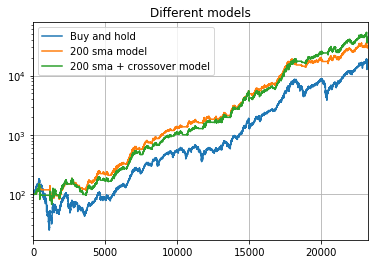

In [9]:
# Part 6: Plot the models

df[[model_0, model_1, model_2]].plot(grid=True, kind='line', title='Different models', logy=True)